# split train and test

In [5]:
import os
import glob
import random
import re
import shutil

# Set seed for reproducibility
random.seed(42)

# Define base directories
base_dir = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Dataset_filtered"
trainval_dir = os.path.join(base_dir, "TrainVal")
color_dir = os.path.join(trainval_dir, "color")
label_dir = os.path.join(trainval_dir, "label")

# Define destination directories for train and validation splits
train_color_dir = os.path.join(base_dir, "train", "color")
train_label_dir = os.path.join(base_dir, "train", "label")
val_color_dir = os.path.join(base_dir, "val", "color")
val_label_dir = os.path.join(base_dir, "val", "label")

# Create the destination directories if they don't exist
for d in [train_color_dir, train_label_dir, val_color_dir, val_label_dir]:
    os.makedirs(d, exist_ok=True)

# Find all jpg files in the color folder
image_files = glob.glob(os.path.join(color_dir, "*.jpg"))

# Group files by animal name (assumes format like "Abyssinian_1.jpg")
groups = {}
pattern = re.compile(r'(.+)_\d+\.jpg')  # capture group for the animal name
for image_file in image_files:
    basename = os.path.basename(image_file)
    match = pattern.match(basename)
    if match:
        animal = match.group(1)
    else:
        animal = "unknown"
    groups.setdefault(animal, []).append(basename)

# Split the files for each animal into train (80%) and val (20%)
train_list = []
val_list = []
for animal, files in groups.items():
    random.shuffle(files)
    split_index = int(0.8 * len(files))
    train_files = files[:split_index]
    val_files = files[split_index:]
    train_list.extend(train_files)
    val_list.extend(val_files)

# Define output text file paths
train_txt_path = os.path.join(base_dir, "train.txt")
val_txt_path = os.path.join(base_dir, "val.txt")

# Copy files to new folders and write paths to train.txt and val.txt
with open(train_txt_path, "w") as train_file, open(val_txt_path, "w") as val_file:
    # Process train split
    for filename in train_list:
        # Copy color image
        src_color = os.path.join(color_dir, filename)
        dst_color = os.path.join(train_color_dir, filename)
        shutil.copy2(src_color, dst_color)
        
        # Derive corresponding label filename (change extension from .jpg to .png)
        label_filename = filename.replace(".jpg", ".png")
        src_label = os.path.join(label_dir, label_filename)
        dst_label = os.path.join(train_label_dir, label_filename)
        if os.path.exists(src_label):
            shutil.copy2(src_label, dst_label)
        
        # Write relative paths to train.txt (format: "train/color/<filename> train/label/<label_filename>")
        train_file.write(f"{os.path.join('train','color',filename)} {os.path.join('train','label',label_filename)}\n")
    
    # Process validation split
    for filename in val_list:
        # Copy color image
        src_color = os.path.join(color_dir, filename)
        dst_color = os.path.join(val_color_dir, filename)
        shutil.copy2(src_color, dst_color)
        
        # Corresponding label filename
        label_filename = filename.replace(".jpg", ".png")
        src_label = os.path.join(label_dir, label_filename)
        dst_label = os.path.join(val_label_dir, label_filename)
        if os.path.exists(src_label):
            shutil.copy2(src_label, dst_label)
        
        # Write relative paths to val.txt
        val_file.write(f"{os.path.join('val','color',filename)} {os.path.join('val','label',label_filename)}\n")

print("Data splitting and copying complete.")
print(f"Train list written to {train_txt_path}")
print(f"Val list written to {val_txt_path}")


Data splitting and copying complete.
Train list written to /Users/guoyuzhang/University/Y5/CV/CV_Assignment/Dataset_filtered/train.txt
Val list written to /Users/guoyuzhang/University/Y5/CV/CV_Assignment/Dataset_filtered/val.txt


# get statistics of the split

In [4]:
import os
import re
from collections import Counter

def extract_animal(filepath):
    """
    Extracts the animal class from a filename.
    Assumes filename format: AnimalName_123.jpg
    """
    # Use regex to extract animal class from the basename.
    pattern = re.compile(r'(.+)_\d+\.jpg')
    basename = os.path.basename(filepath)
    match = pattern.match(basename)
    if match:
        return match.group(1)
    else:
        return "unknown"

def get_statistics(txt_file):
    """
    Reads the text file (each line with two paths separated by whitespace)
    and returns the total count and a Counter with the distribution of animal classes.
    """
    counter = Counter()
    total = 0
    with open(txt_file, "r") as f:
        for line in f:
            line = line.strip()
            if line:
                parts = line.split()
                if len(parts) != 2:
                    print(f"Warning: Unexpected line format: {line}")
                    continue
                # Extract the animal from the color image path (first column)
                animal = extract_animal(parts[0])
                counter[animal] += 1
                total += 1
    return total, counter

def print_statistics(txt_file):
    total, counter = get_statistics(txt_file)
    print(f"Statistics for {txt_file}:")
    print(f"  Total samples: {total}")
    print("  Distribution by animal class:")
    for animal, count in counter.items():
        print(f"    {animal}: {count}")

if __name__ == "__main__":
    # Update base_dir if needed
    base_dir = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Dataset_filtered"
    train_txt_path = os.path.join(base_dir, "train.txt")
    val_txt_path = os.path.join(base_dir, "val.txt")
    
    print_statistics(train_txt_path)
    print()
    print_statistics(val_txt_path)


Statistics for /Users/guoyuzhang/University/Y5/CV/CV_Assignment/Dataset_filtered/train.txt:
  Total samples: 2935
  Distribution by animal class:
    basset_hound: 80
    Siamese: 79
    shiba_inu: 80
    Birman: 80
    saint_bernard: 78
    Egyptian_Mau: 72
    scottish_terrier: 80
    pomeranian: 80
    german_shorthaired: 80
    english_setter: 80
    newfoundland: 76
    British_Shorthair: 80
    boxer: 80
    great_pyrenees: 80
    leonberger: 79
    japanese_chin: 80
    Ragdoll: 80
    english_cocker_spaniel: 76
    havanese: 80
    Maine_Coon: 80
    american_pit_bull_terrier: 80
    american_bulldog: 80
    keeshond: 80
    miniature_pinscher: 79
    samoyed: 80
    Abyssinian: 80
    Sphynx: 80
    beagle: 80
    Bombay: 76
    Bengal: 80
    staffordshire_bull_terrier: 80
    Persian: 80
    pug: 80
    Russian_Blue: 80
    chihuahua: 80
    yorkshire_terrier: 80
    wheaten_terrier: 80

Statistics for /Users/guoyuzhang/University/Y5/CV/CV_Assignment/Dataset_filtered/val.txt

In [6]:
import os
import cv2
import glob
from collections import Counter

# Specify the directory containing your images.
# You can change this to any folder you'd like to analyze.
image_folder = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Dataset_filtered/TrainVal/color"

# Find all jpg files in the folder
image_files = glob.glob(os.path.join(image_folder, "*.jpg"))

resolutions = []  # List to store (width, height) tuples

for img_path in image_files:
    img = cv2.imread(img_path)
    if img is None:
        print("Could not read:", img_path)
        continue
    height, width = img.shape[:2]
    resolutions.append((width, height))

# If any images were found, calculate statistics.
if resolutions:
    widths = [w for w, h in resolutions]
    heights = [h for w, h in resolutions]
    avg_width = sum(widths) / len(widths)
    avg_height = sum(heights) / len(heights)
    min_width = min(widths)
    max_width = max(widths)
    min_height = min(heights)
    max_height = max(heights)
    
    # Count unique resolution occurrences
    resolution_counter = Counter(resolutions)
    
    print("Total images:", len(resolutions))
    print(f"Average resolution: {int(avg_width)} x {int(avg_height)}")
    print(f"Minimum width: {min_width}, Minimum height: {min_height}")
    print(f"Maximum width: {max_width}, Maximum height: {max_height}")
    print("\nUnique resolutions (width x height) and counts:")
    for res, count in resolution_counter.items():
        print(f"{res[0]} x {res[1]}: {count}")
else:
    print("No images found in the specified folder.")


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


Total images: 3673
Average resolution: 429 x 381
Minimum width: 114, Minimum height: 108
Maximum width: 1999, Maximum height: 1734

Unique resolutions (width x height) and counts:
374 x 500: 4
333 x 500: 221
327 x 500: 5
500 x 375: 769
500 x 333: 487
500 x 357: 10
280 x 210: 1
500 x 426: 5
300 x 225: 201
222 x 300: 1
500 x 335: 40
233 x 350: 2
500 x 400: 16
500 x 500: 31
500 x 403: 2
332 x 500: 39
425 x 319: 1
500 x 300: 1
600 x 900: 3
500 x 291: 1
239 x 300: 3
500 x 307: 2
500 x 323: 6
375 x 500: 249
300 x 255: 2
500 x 334: 123
277 x 200: 1
500 x 263: 1
500 x 312: 1
378 x 300: 1
184 x 250: 1
297 x 300: 3
500 x 364: 3
144 x 108: 1
225 x 300: 35
437 x 500: 1
500 x 281: 15
373 x 451: 1
467 x 500: 1
334 x 500: 66
500 x 412: 3
202 x 300: 3
500 x 472: 1
401 x 500: 2
432 x 348: 1
484 x 500: 3
500 x 376: 8
300 x 200: 14
320 x 500: 2
281 x 500: 6
300 x 284: 2
500 x 443: 1
500 x 429: 2
519 x 287: 1
500 x 395: 5
500 x 455: 3
300 x 224: 10
500 x 428: 2
500 x 479: 5
200 x 239: 1
600 x 400: 1
424 x

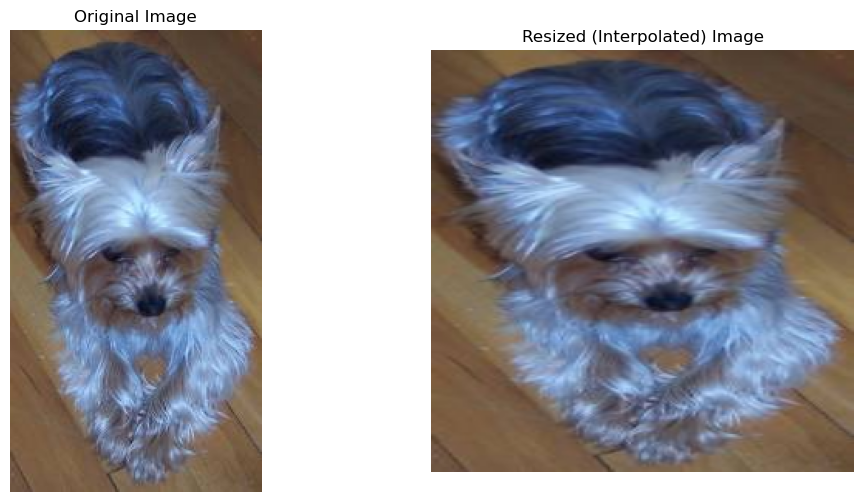

In [9]:
import cv2
import matplotlib.pyplot as plt

# Path to an example image
image_path = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Dataset_filtered/TrainVal/color/yorkshire_terrier_144.jpg"

# Load the original image (OpenCV loads in BGR format)
original = cv2.imread(image_path, cv2.IMREAD_COLOR)
if original is None:
    raise ValueError("Could not load the image. Please check the image path.")

# Convert the image from BGR to RGB for display purposes
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# Define the target size (for example, 256x256)
TARGET_WIDTH, TARGET_HEIGHT = 256, 256
target_size = (TARGET_WIDTH, TARGET_HEIGHT)

# Resize the image using bilinear interpolation
resized = cv2.resize(original_rgb, target_size, interpolation=cv2.INTER_LINEAR)

# Display the original and resized images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(resized)
plt.title("Resized (Interpolated) Image")
plt.axis("off")

plt.show()


In [10]:
import os
import cv2
import shutil

# Set target dimensions (adjust as needed)
TARGET_WIDTH = 256
TARGET_HEIGHT = 256
target_size = (TARGET_WIDTH, TARGET_HEIGHT)

# Base directory (adjust this to your setup)
base_dir = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Dataset_filtered"

# Directories for train and val splits (from your splitting code)
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")

# Create destination directories for resized data:
# For training, we resize both images and masks.
resized_train_color_dir = os.path.join(base_dir, "train_resized", "color")
resized_train_label_dir = os.path.join(base_dir, "train_resized", "label")

# For validation, we resize images but keep masks at original resolution.
resized_val_color_dir = os.path.join(base_dir, "val_resized", "color")
resized_val_label_dir = os.path.join(base_dir, "val_resized", "label")

for d in [resized_train_color_dir, resized_train_label_dir,
          resized_val_color_dir, resized_val_label_dir]:
    os.makedirs(d, exist_ok=True)

def resize_and_save(src_path, dst_path, target_size, is_mask=False):
    """
    Resize an image or mask and save it.
    For masks, nearest-neighbor interpolation is used to preserve class labels.
    For images, bilinear interpolation is typically used.
    """
    interp = cv2.INTER_NEAREST if is_mask else cv2.INTER_LINEAR
    # Read as grayscale if mask, otherwise as color
    flag = cv2.IMREAD_GRAYSCALE if is_mask else cv2.IMREAD_COLOR
    img = cv2.imread(src_path, flag)
    if img is None:
        print("Error reading:", src_path)
        return
    resized = cv2.resize(img, target_size, interpolation=interp)
    cv2.imwrite(dst_path, resized)

# -----------------------------------------
# Process Training Data: Resize both images and masks
# -----------------------------------------
train_color_source = os.path.join(train_dir, "color")
train_label_source = os.path.join(train_dir, "label")

# Resize training images (color)
for filename in os.listdir(train_color_source):
    if filename.lower().endswith(".jpg"):
        src_path = os.path.join(train_color_source, filename)
        dst_path = os.path.join(resized_train_color_dir, filename)
        resize_and_save(src_path, dst_path, target_size, is_mask=False)

# Resize training masks (labels)
for filename in os.listdir(train_label_source):
    if filename.lower().endswith(".png"):
        src_path = os.path.join(train_label_source, filename)
        dst_path = os.path.join(resized_train_label_dir, filename)
        resize_and_save(src_path, dst_path, target_size, is_mask=True)

# -----------------------------------------
# Process Validation Data:
# - Resize the images to the target size for model input.
# - Keep the ground-truth masks at their original resolution for evaluation.
# -----------------------------------------
val_color_source = os.path.join(val_dir, "color")
val_label_source = os.path.join(val_dir, "label")

# Resize validation images
for filename in os.listdir(val_color_source):
    if filename.lower().endswith(".jpg"):
        src_path = os.path.join(val_color_source, filename)
        dst_path = os.path.join(resized_val_color_dir, filename)
        resize_and_save(src_path, dst_path, target_size, is_mask=False)

# Copy validation masks unchanged (original resolution)
for filename in os.listdir(val_label_source):
    if filename.lower().endswith(".png"):
        src_path = os.path.join(val_label_source, filename)
        dst_path = os.path.join(resized_val_label_dir, filename)
        shutil.copy2(src_path, dst_path)

print("Resizing complete.")


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


Resizing complete.


# randaugment


In [ ]:
import os
import random
from PIL import Image, ImageOps, ImageEnhance
import math
from torchvision.transforms import functional as F
from torchvision.transforms.functional import InterpolationMode

# Define the RandAugment operation pool (14 ops as in the original paper)
RA_OPERATIONS = [
    "Identity", "AutoContrast", "Equalize",
    "Rotate", "Solarize", "Color", "Posterize",
    "Contrast", "Brightness", "Sharpness",
    "ShearX", "ShearY", "TranslateX", "TranslateY"
]

def apply_operation(img, mask, op_name, magnitude):
    """
    Apply a single augmentation operation to the image (and mask, if applicable).
    'magnitude' is on a 0-10 scale indicating severity.
    """
    if op_name == "Identity":
        return img, mask  # no change

    if op_name == "AutoContrast":
        img = ImageOps.autocontrast(img)
        return img, mask

    if op_name == "Equalize":
        img = ImageOps.equalize(img)
        return img, mask

    if op_name == "Rotate":
        max_deg = 30.0
        angle = magnitude / 10.0 * max_deg
        if random.random() < 0.5:
            angle = -angle
        img = img.rotate(angle, resample=Image.BILINEAR, fillcolor=0)
        mask = mask.rotate(angle, resample=Image.NEAREST, fillcolor=0)
        return img, mask

    if op_name == "Solarize":
        thresh = int(256 - (magnitude / 10.0) * 256)
        img = ImageOps.solarize(img, thresh)
        return img, mask

    if op_name == "Color":
        factor = 1.0 + (magnitude / 10.0) * 0.9
        if random.random() < 0.5:
            factor = 1.0 - (magnitude / 10.0) * 0.9
        img = ImageEnhance.Color(img).enhance(factor)
        return img, mask

    if op_name == "Posterize":
        bits = int(round(8 - (magnitude / 10.0) * 4))
        bits = max(1, bits)
        img = ImageOps.posterize(img, bits)
        return img, mask

    if op_name == "Contrast":
        factor = 1.0 + (magnitude / 10.0) * 0.9
        if random.random() < 0.5:
            factor = 1.0 - (magnitude / 10.0) * 0.9
        img = ImageEnhance.Contrast(img).enhance(factor)
        return img, mask

    if op_name == "Brightness":
        factor = 1.0 + (magnitude / 10.0) * 0.9
        if random.random() < 0.5:
            factor = 1.0 - (magnitude / 10.0) * 0.9
        img = ImageEnhance.Brightness(img).enhance(factor)
        return img, mask

    if op_name == "Sharpness":
        factor = 1.0 + (magnitude / 10.0) * 0.9
        if random.random() < 0.5:
            factor = 1.0 - (magnitude / 10.0) * 0.9
        img = ImageEnhance.Sharpness(img).enhance(factor)
        return img, mask

    # Geometric operations: these need to be applied identically to the mask
    if op_name == "ShearX":
        shear_factor = magnitude / 10.0 * 0.3
        if random.random() < 0.5:
            shear_factor = -shear_factor
        shear_degrees = math.degrees(math.atan(shear_factor))
        img = F.affine(img, angle=0.0, translate=(0, 0), scale=1.0,
                       shear=(shear_degrees, 0.0),
                       interpolation=InterpolationMode.BILINEAR, fill=0)
        mask = F.affine(mask, angle=0.0, translate=(0, 0), scale=1.0,
                        shear=(shear_degrees, 0.0),
                        interpolation=InterpolationMode.NEAREST, fill=0)
        return img, mask

    if op_name == "ShearY":
        shear_factor = magnitude / 10.0 * 0.3
        if random.random() < 0.5:
            shear_factor = -shear_factor
        shear_degrees = math.degrees(math.atan(shear_factor))
        img = F.affine(img, angle=0.0, translate=(0, 0), scale=1.0,
                       shear=(0.0, shear_degrees),
                       interpolation=InterpolationMode.BILINEAR, fill=0)
        mask = F.affine(mask, angle=0.0, translate=(0, 0), scale=1.0,
                        shear=(0.0, shear_degrees),
                        interpolation=InterpolationMode.NEAREST, fill=0)
        return img, mask

    if op_name == "TranslateX":
        max_frac = 0.45
        dx = int(round(magnitude / 10.0 * max_frac * img.width))
        if random.random() < 0.5:
            dx = -dx
        img = F.affine(img, angle=0.0, translate=(dx, 0), scale=1.0,
                       shear=(0.0, 0.0), interpolation=InterpolationMode.BILINEAR, fill=0)
        mask = F.affine(mask, angle=0.0, translate=(dx, 0), scale=1.0,
                        shear=(0.0, 0.0), interpolation=InterpolationMode.NEAREST, fill=0)
        return img, mask

    if op_name == "TranslateY":
        max_frac = 0.45
        dy = int(round(magnitude / 10.0 * max_frac * img.height))
        if random.random() < 0.5:
            dy = -dy
        img = F.affine(img, angle=0.0, translate=(0, dy), scale=1.0,
                       shear=(0.0, 0.0), interpolation=InterpolationMode.BILINEAR, fill=0)
        mask = F.affine(mask, angle=0.0, translate=(0, dy), scale=1.0,
                        shear=(0.0, 0.0), interpolation=InterpolationMode.NEAREST, fill=0)
        return img, mask

    return img, mask

def randaugment_image_mask(img, mask, N, M):
    """Apply RandAugment (N operations with magnitude M) to the given PIL image and mask."""
    ops = random.sample(RA_OPERATIONS, N)  # choose N distinct ops at random
    for op in ops:
        img, mask = apply_operation(img, mask, op, M)
    return img, mask

def run_randaugment_train_resized(input_base, output_base, N=2, M=9):
    """
    Process each image-mask pair from the resized training data.
    
    Expects:
      - Images in:  input_base/train_resized/color
      - Masks in:   input_base/train_resized/label
    
    Saves augmented outputs in:
      - output_base/train_randaugmented/color
      - output_base/train_randaugmented/label
    """
    in_img_dir = os.path.join(input_base, "train_resized", "color")
    in_mask_dir = os.path.join(input_base, "train_resized", "label")
    out_img_dir = os.path.join(output_base, "train_randaugmented", "color")
    out_mask_dir = os.path.join(output_base, "train_randaugmented", "label")
    os.makedirs(out_img_dir, exist_ok=True)
    os.makedirs(out_mask_dir, exist_ok=True)

    for filename in os.listdir(in_img_dir):
        if not filename.lower().endswith(".jpg"):
            continue
        img_path = os.path.join(in_img_dir, filename)
        base_name, ext = os.path.splitext(filename)
        # Try common mask extensions (often masks are stored as .png)
        mask_candidates = [base_name + ".png", base_name + ".jpg", base_name + ".jpeg", base_name + ".bmp", base_name + ".tif"]
        mask_path = None
        for cand in mask_candidates:
            cand_path = os.path.join(in_mask_dir, cand)
            if os.path.exists(cand_path):
                mask_path = cand_path
                break
        if mask_path is None:
            print(f"Mask for image {filename} not found, skipping.")
            continue

        img = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path)
        if mask.mode not in ["L", "I"]:
            mask = mask.convert("L")

        aug_img, aug_mask = randaugment_image_mask(img, mask, N, M)
        out_img_path = os.path.join(out_img_dir, filename)
        out_mask_path = os.path.join(out_mask_dir, os.path.basename(mask_path))
        aug_img.save(out_img_path)
        aug_mask.save(out_mask_path)
        print(f"Saved augmented image to {out_img_path} and mask to {out_mask_path}")

# --- Example usage in a notebook cell ---
# Set your base directory. In your case, it is:
base_dir = "/Users/guoyuzhang/University/Y5/CV/CV_Assignment/Dataset_filtered"
# We'll use the same base directory for output (augmented data will be saved under a new subfolder)
run_randaugment_train_resized(base_dir, base_dir, N=2, M=9)


ModuleNotFoundError: No module named 'torchvision'